# Cardiovascular Diseases

importing required libraries 

Loading dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load the data
dt = pd.read_csv('/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv')
dt.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [3]:
dt.columns ## FEATURES

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
dt_copy = dt.copy()
dt_copy = dt_copy[:10000]  ## Copy the data for safe use

Converting all of the object variables to to categorical variables

In [6]:
for column in dt_copy.select_dtypes(include='object').columns:
    dt_copy[column] = dt_copy[column].astype('category')

Controll for if there is any missing data

In [7]:
missing_values = dt_copy.isnull().any() 

print(missing_values)

General_Health                  False
Checkup                         False
Exercise                        False
Heart_Disease                   False
Skin_Cancer                     False
Other_Cancer                    False
Depression                      False
Diabetes                        False
Arthritis                       False
Sex                             False
Age_Category                    False
Height_(cm)                     False
Weight_(kg)                     False
BMI                             False
Smoking_History                 False
Alcohol_Consumption             False
Fruit_Consumption               False
Green_Vegetables_Consumption    False
FriedPotato_Consumption         False
dtype: bool


## ****For Categorical Values:****

Remove Missing Data: If there are very few missing values or they can be ignored, you can directly remove them.

Fill with Mode: Replace missing values with the most frequent value (mode) in the column.

Fill with a Specific Category: Use a specific category like "unknown" or "other" to fill missing values.

## ****For Numerical Values:****

Remove Missing Data: If there are very few missing values or they can be ignored, you can directly remove them.

Fill with Mean, Median, or Mode: Replace missing values with the column's mean, median, or mode. This is a common method for handling missing numerical data.

In [8]:
dt.describe()

Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000                      4.000000   
50%            30.000000                     12.000000   
75%            30.000000                     20.000000   
max           120.000000                    128.000000   

       FriedPotato_Consumption  
count            308854.000000  
mean                  6.296616  
std                   8.582954  
min                   0.000000  
25%                   2.000000  
50%                   4.000000  
75%                   8.000000  
max                 128.000000

In [9]:
cat_df = dt_copy.select_dtypes(include=['category'])
cat_df

General_Health                  Checkup Exercise Heart_Disease  \
0              Poor  Within the past 2 years       No            No   
1         Very Good     Within the past year       No           Yes   
2         Very Good     Within the past year      Yes            No   
3              Poor     Within the past year      Yes           Yes   
4              Good     Within the past year       No            No   
...             ...                      ...      ...           ...   
9995      Very Good     Within the past year      Yes            No   
9996      Very Good     Within the past year      Yes            No   
9997           Fair     Within the past year      Yes            No   
9998      Excellent      5 or more years ago      Yes            No   
9999      Excellent  Within the past 5 years       No            No   

     Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
0             No           No         No       No       Yes  Female   
1             No           No         No      Yes        No  Female   
2             No           No         No      Yes        No  Female   
3             No           No         No      Yes        No    Male   
4             No           No         No       No        No    Male   
...          ...          ...        ...      ...       ...     ...   
9995          No           No         No       No        No    Male   
9996          No           No         No       No        No    Male   
9997          No           No        Yes      Yes        No  Female   
9998          No           No         No       No        No    Male   
9999          No           No         No       No        No  Female   

     Age_Category Smoking_History  
0           70-74             Yes  
1           70-74              No  
2           60-64              No  
3           75-79              No  
4             80+             Yes  
...           ...             ...  
9995        18-24              No  
9996        45-49              No  
9997        55-59              No  
9998        75-79             Yes  
9999        40-44             Yes  

[10000 rows x 12 columns]

In [10]:
cat_df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')

In [11]:
for e in cat_df.columns:
    print("Variable : {}".format(e)+"\n")
    print(cat_df[e].unique())
    print("****** \n")

Variable : General_Health

['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
Categories (5, object): ['Excellent', 'Fair', 'Good', 'Poor', 'Very Good']
****** 

Variable : Checkup

['Within the past 2 years', 'Within the past year', '5 or more years ago', 'Within the past 5 years', 'Never']
Categories (5, object): ['5 or more years ago', 'Never', 'Within the past 2 years', 'Within the past 5 years', 'Within the past year']
****** 

Variable : Exercise

['No', 'Yes']
Categories (2, object): ['No', 'Yes']
****** 

Variable : Heart_Disease

['No', 'Yes']
Categories (2, object): ['No', 'Yes']
****** 

Variable : Skin_Cancer

['No', 'Yes']
Categories (2, object): ['No', 'Yes']
****** 

Variable : Other_Cancer

['No', 'Yes']
Categories (2, object): ['No', 'Yes']
****** 

Variable : Depression

['No', 'Yes']
Categories (2, object): ['No', 'Yes']
****** 

Variable : Diabetes

['No', 'Yes', 'No, pre-diabetes or borderline diabetes', 'Yes, but female told only during pregnancy']
Categories (4, 

# Graphs using Categorical Values

In [12]:
import matplotlib.pyplot as plt

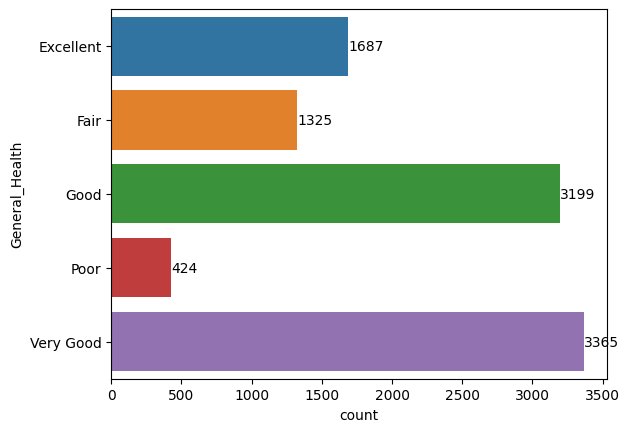

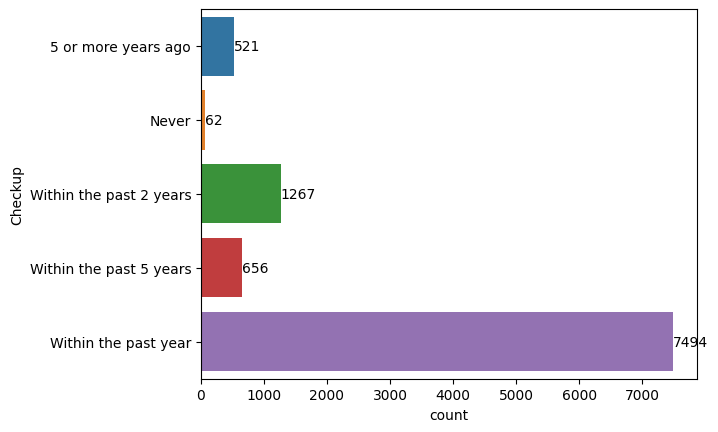

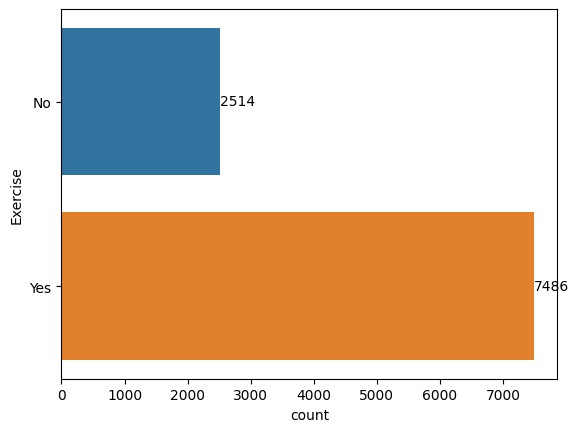

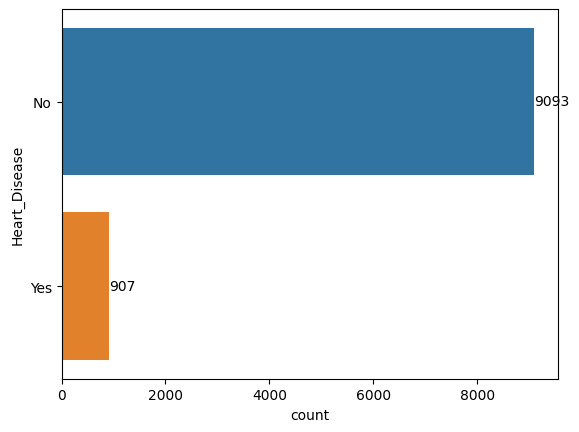

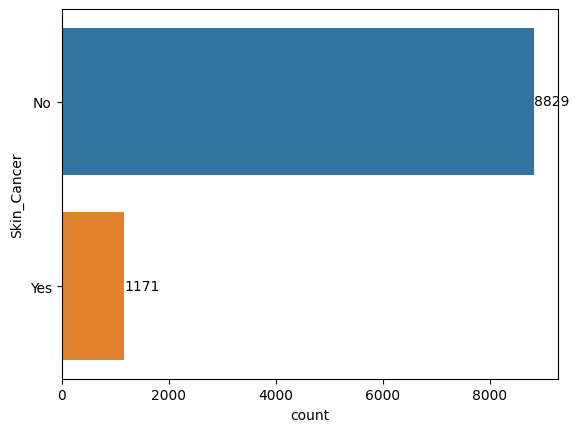

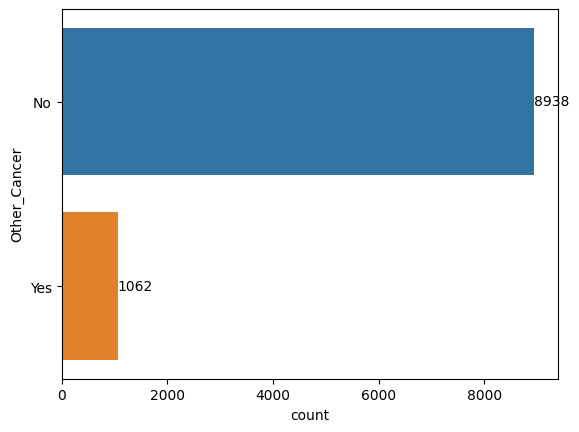

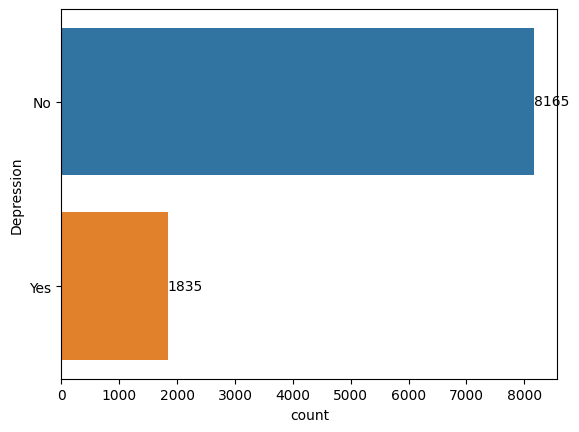

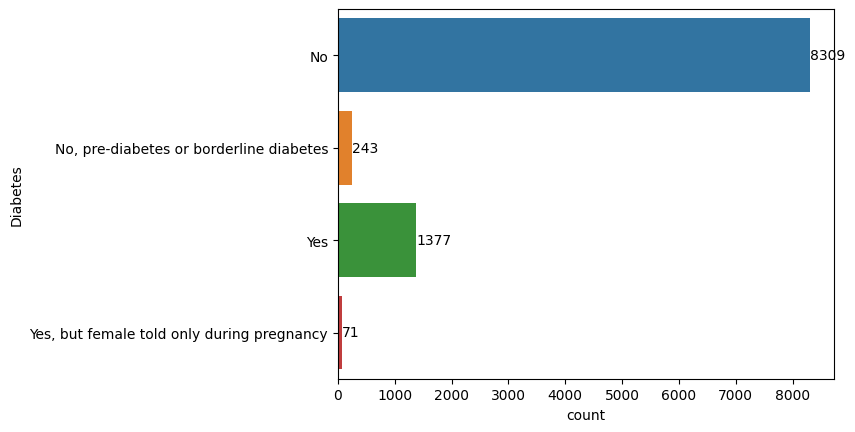

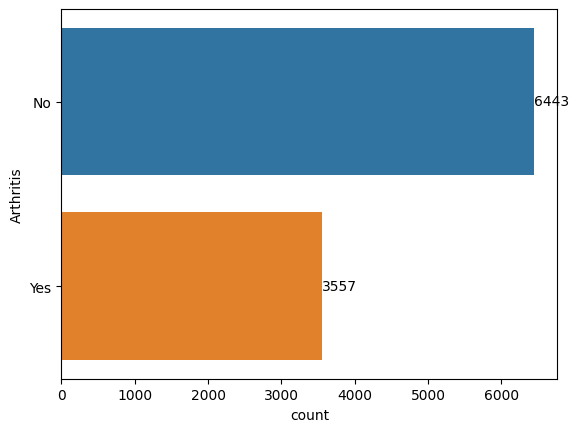

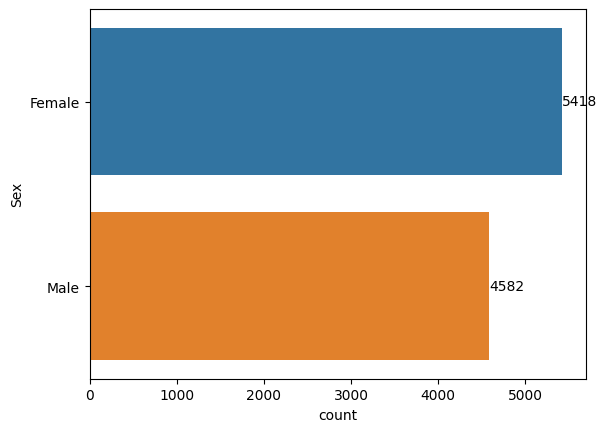

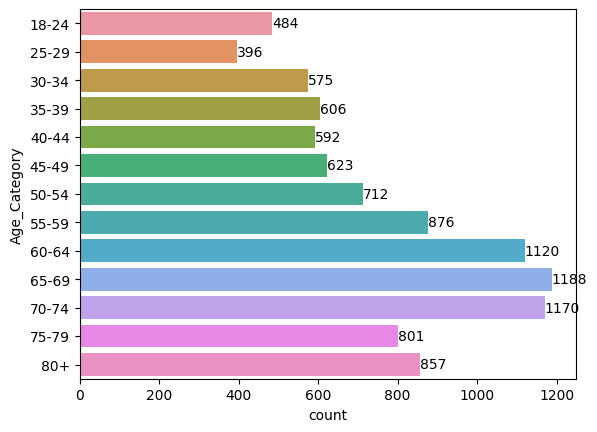

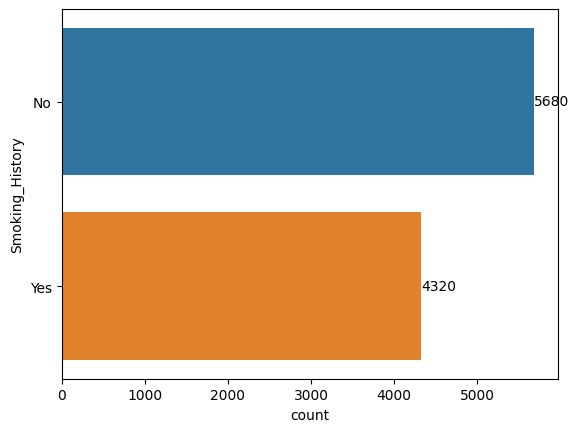

In [13]:
# Iterate over categorical columns
for column in dt_copy.select_dtypes(include='category').columns:
    # Create a countplot
    plot = sns.countplot(y=column, data=dt_copy)
    
    # Add count labels to each bar
    for p in plot.patches:
        count = p.get_width()
        y = p.get_y() + p.get_height() / 2
        plot.text(count, y, int(count), ha='left', va='center')
    
    # Show the plot
    plt.show()

# Visualization of Outliers Data

*Comparing by using boxplots and violin plot

Numerical Values

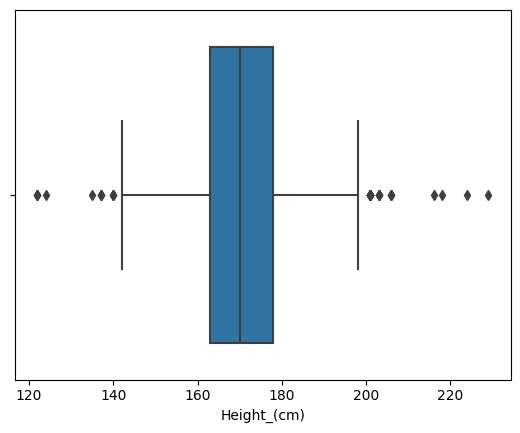

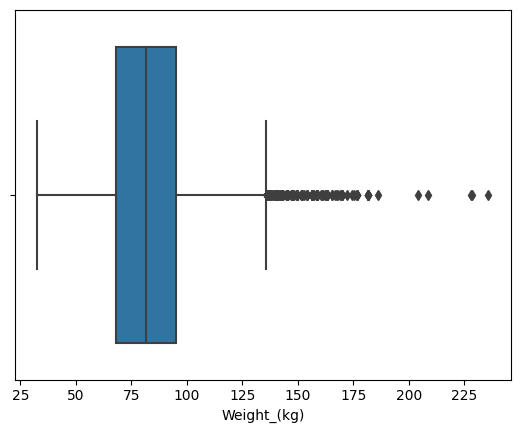

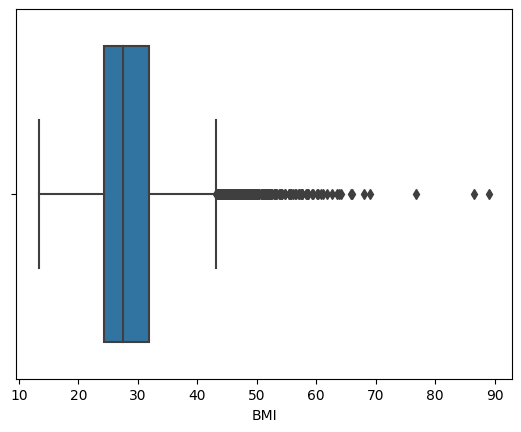

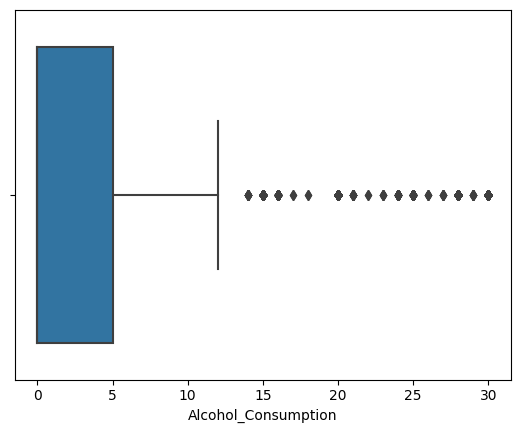

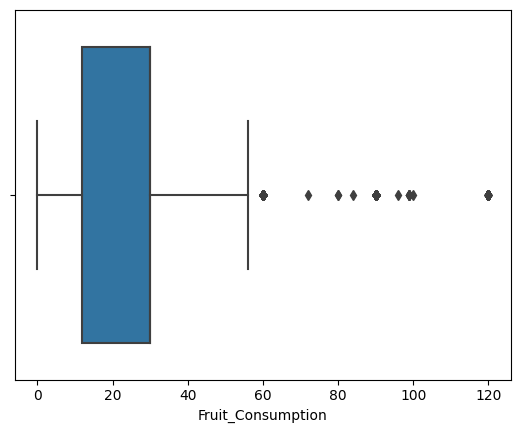

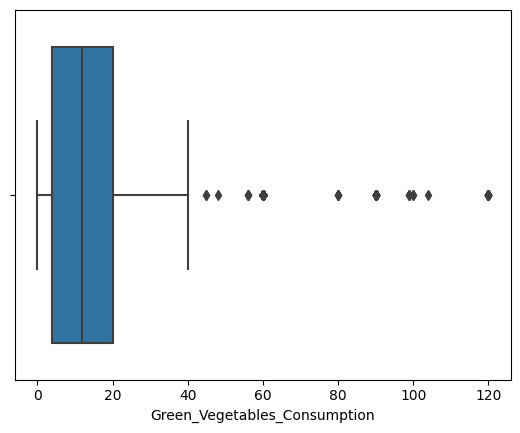

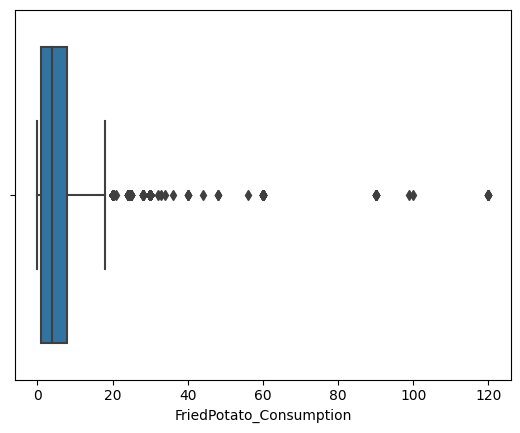

In [14]:
for column in dt_copy.select_dtypes(include='float64').columns:
    sns.boxplot(x = dt_copy[column])
    plt.show()

In [15]:
#distribution of BMI according to some categorical variables
cat_var = ["Heart_Disease","Skin_Cancer","Other_Cancer","Depression","Arthritis","Diabetes"]

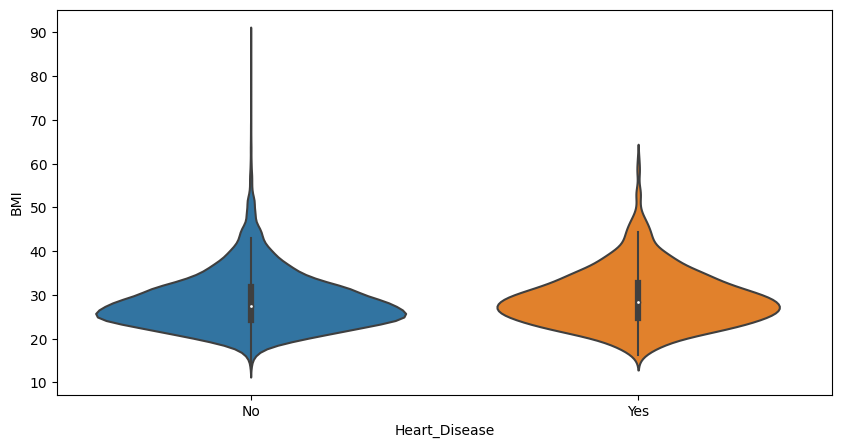

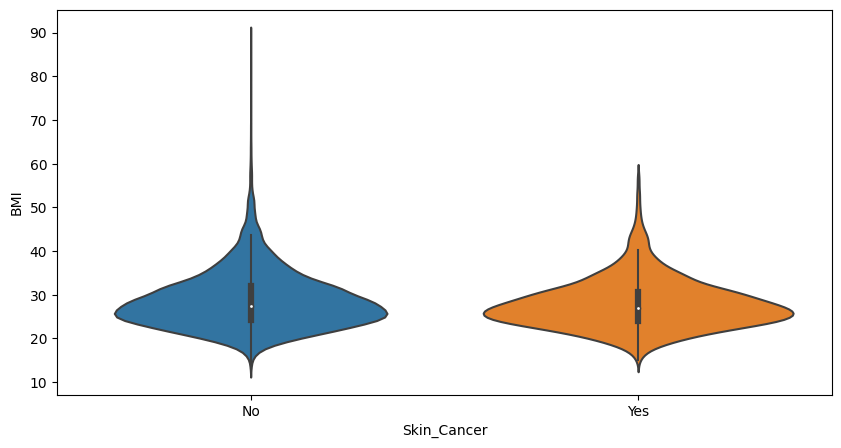

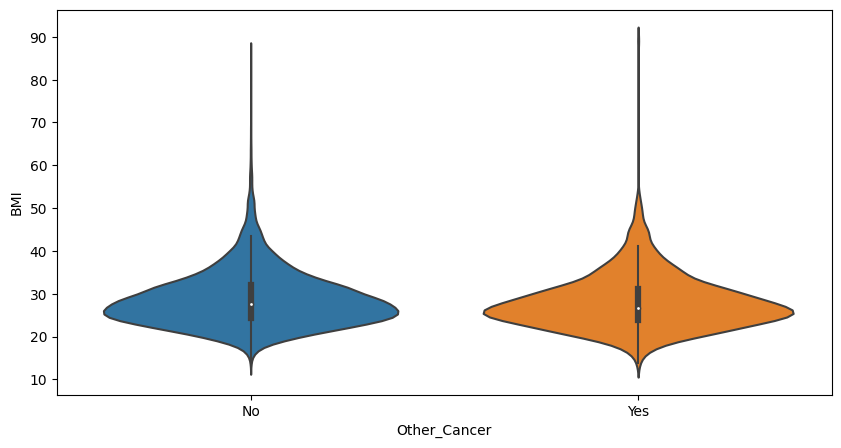

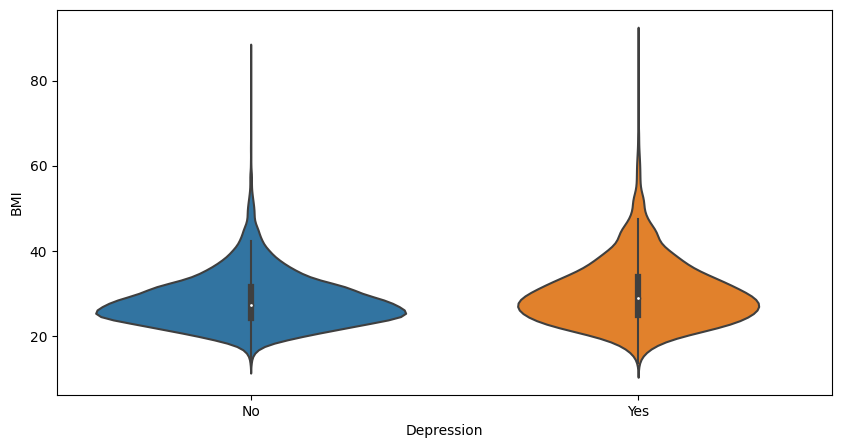

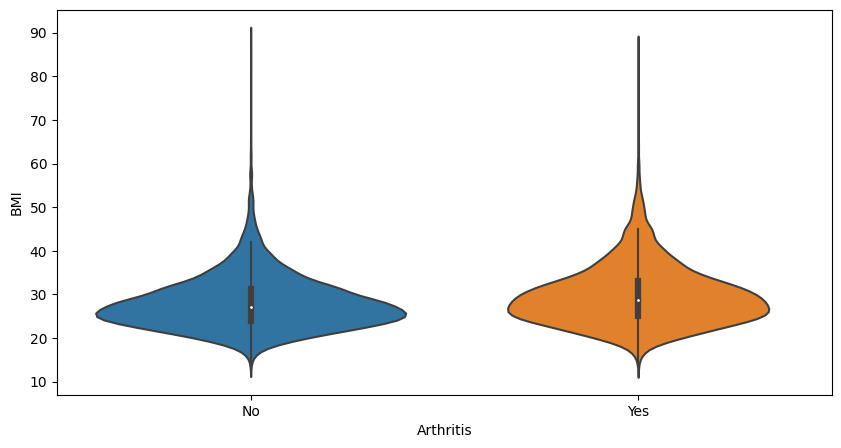

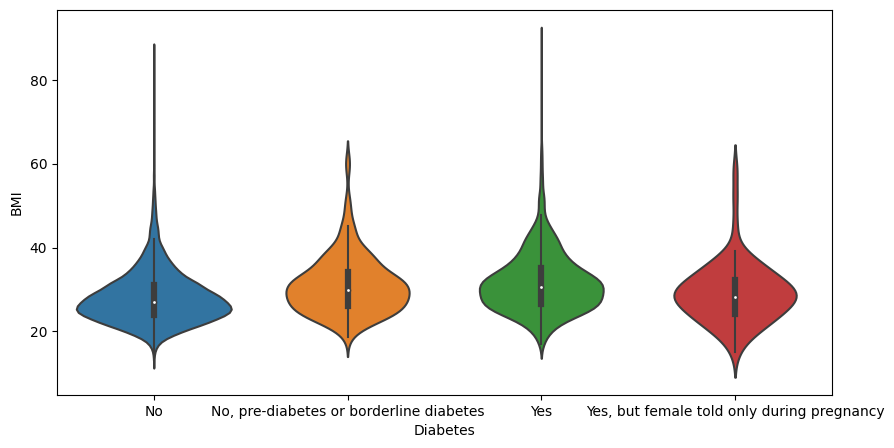

In [16]:
#distribution of BMI according to some categorical variables usiing violin plot
for var in cat_var:
    plt.figure(figsize=(10,5))
    sns.violinplot(x = dt_copy[var], y = dt_copy["BMI"] ,width=0.8, linewidth=1.5)
    plt.show()

In [17]:
dt_copy.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [18]:
data = dt[:10000]

<Figure size 1200x800 with 0 Axes>

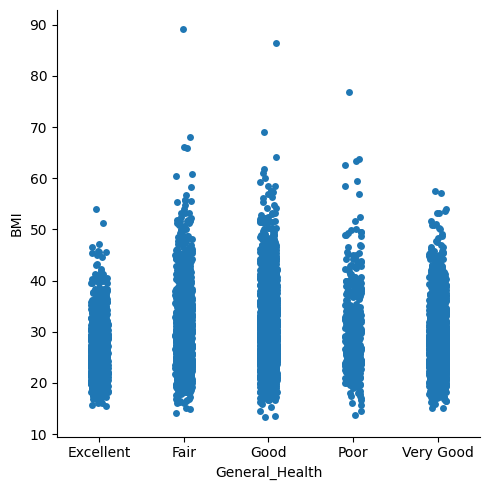

In [19]:
plt.figure(figsize = (12,8));
sns.catplot(x="General_Health", y="BMI" ,data = dt_copy);

<Figure size 1500x400 with 0 Axes>

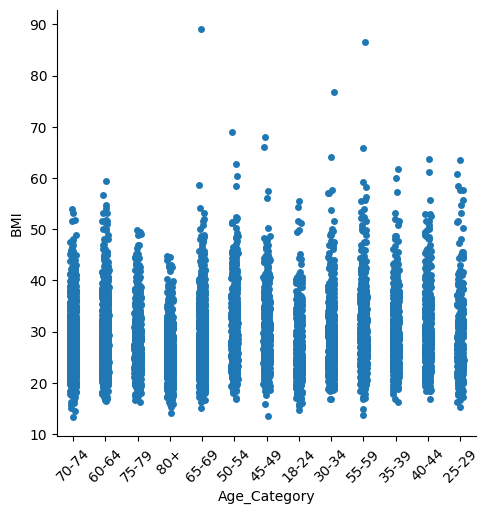

In [20]:
plt.figure(figsize = (15,4));
sns.catplot(x="Age_Category", y="BMI" ,data = data);
plt.xticks(rotation = 45);

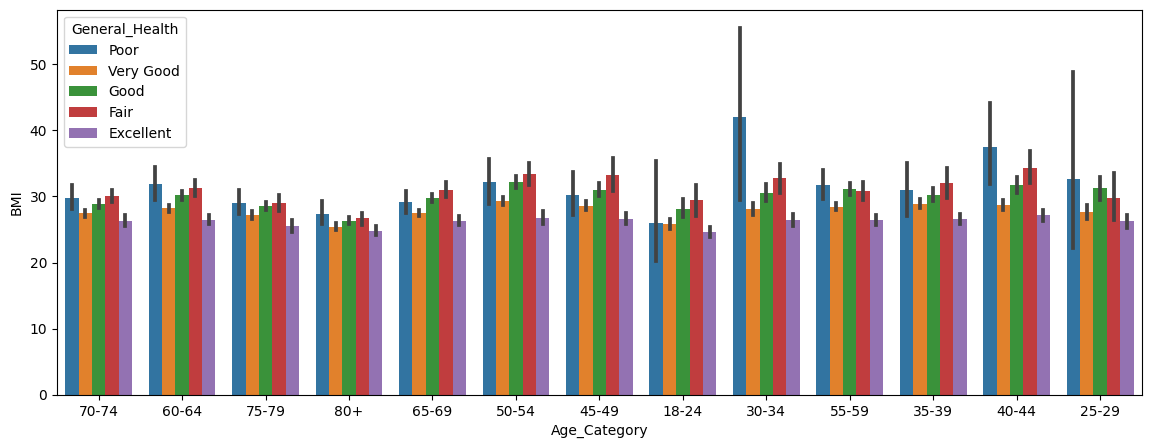

In [21]:
plt.figure(figsize=(14,5))
sns.barplot(x="Age_Category", y="BMI", hue="General_Health", data= data);

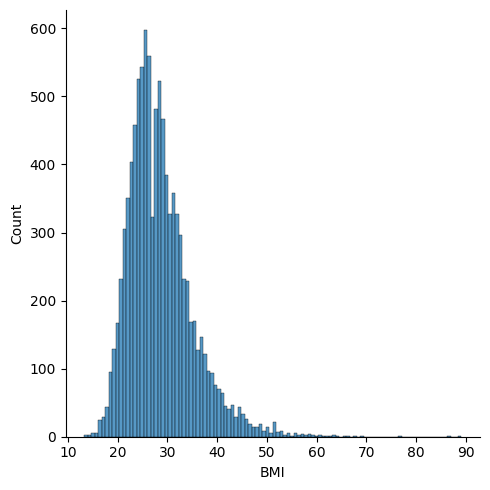

In [22]:
sns.displot(dt_copy.BMI , kde = False)

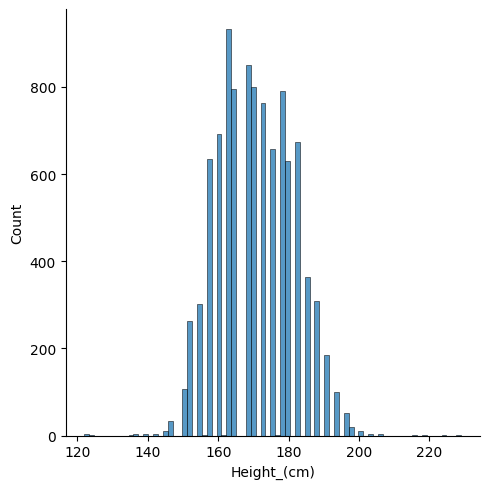

In [23]:
sns.displot(dt_copy["Height_(cm)"] , kde = False)

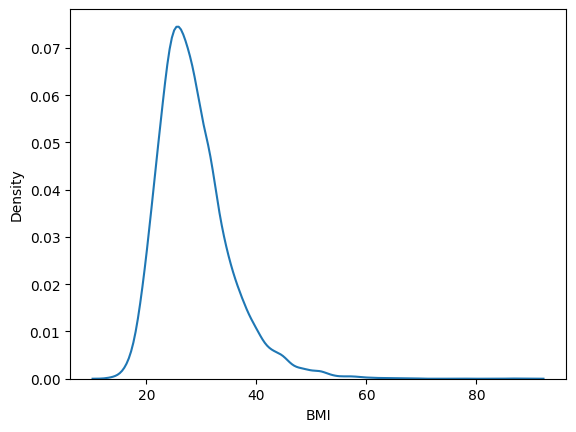

In [24]:
sns.distplot(dt_copy.BMI, hist=False);

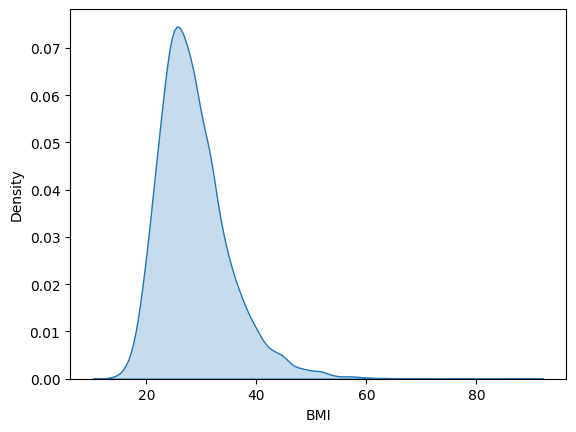

In [25]:
sns.kdeplot(dt_copy.BMI, shade=True);

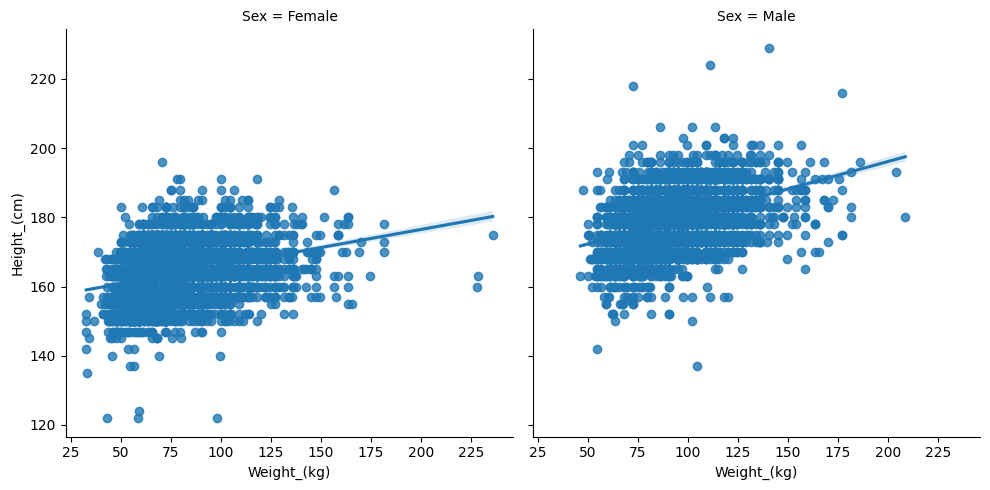

In [26]:
sns.lmplot(x="Weight_(kg)", y="Height_(cm)", data=dt_copy ,col="Sex");

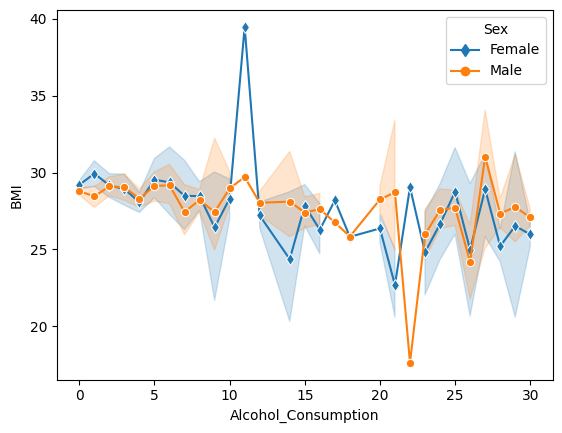

In [27]:
sns.lineplot(x="Alcohol_Consumption", y="BMI", hue="Sex", data=dt_copy ,style="Sex",markers=['d','o'],dashes=False);

In [28]:
df = dt.copy()

### 1. Statistical Inference on Patient Demographic Data

1.1 Age & Gender

*Considering the age range of residents is crucial for studying health trends. Elderly people are more prone to certain diseases than the young.

*We look at how many people are in different age groups in the dataset. Residents in the dataset are between 18 and 85 years old, with a median age of 45 years.

*This information helps healthcare providers and insurance companies design age-specific health plans and policies.

*Dividing the ages from 18 to 80+ into 13 parts is a useful way to organize the data for analysis.

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

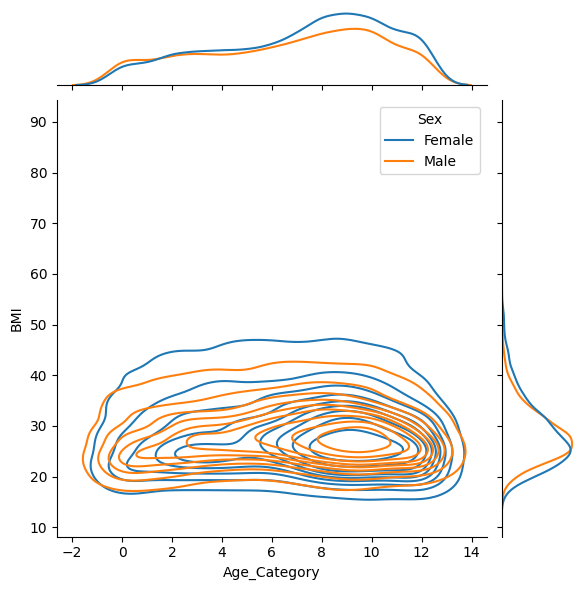

In [30]:
# #comparing the relationship between BMI and Age using different 
#encoding for the Age_Category
dt_copy["Age_Category"] = labelencoder.fit_transform(dt_copy["Age_Category"])
sns.jointplot(x = "Age_Category", y = "BMI", data = dt_copy, kind = "kde",hue= "Sex")
plt.show()

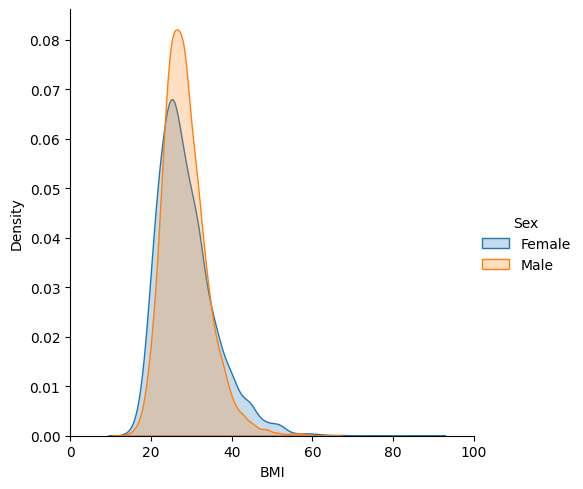

In [31]:
(sns.FacetGrid(dt_copy,
              hue="Sex",
              height=5,
              xlim=(0,100))
        .map(sns.kdeplot, "BMI", shade=True)
        .add_legend()
);

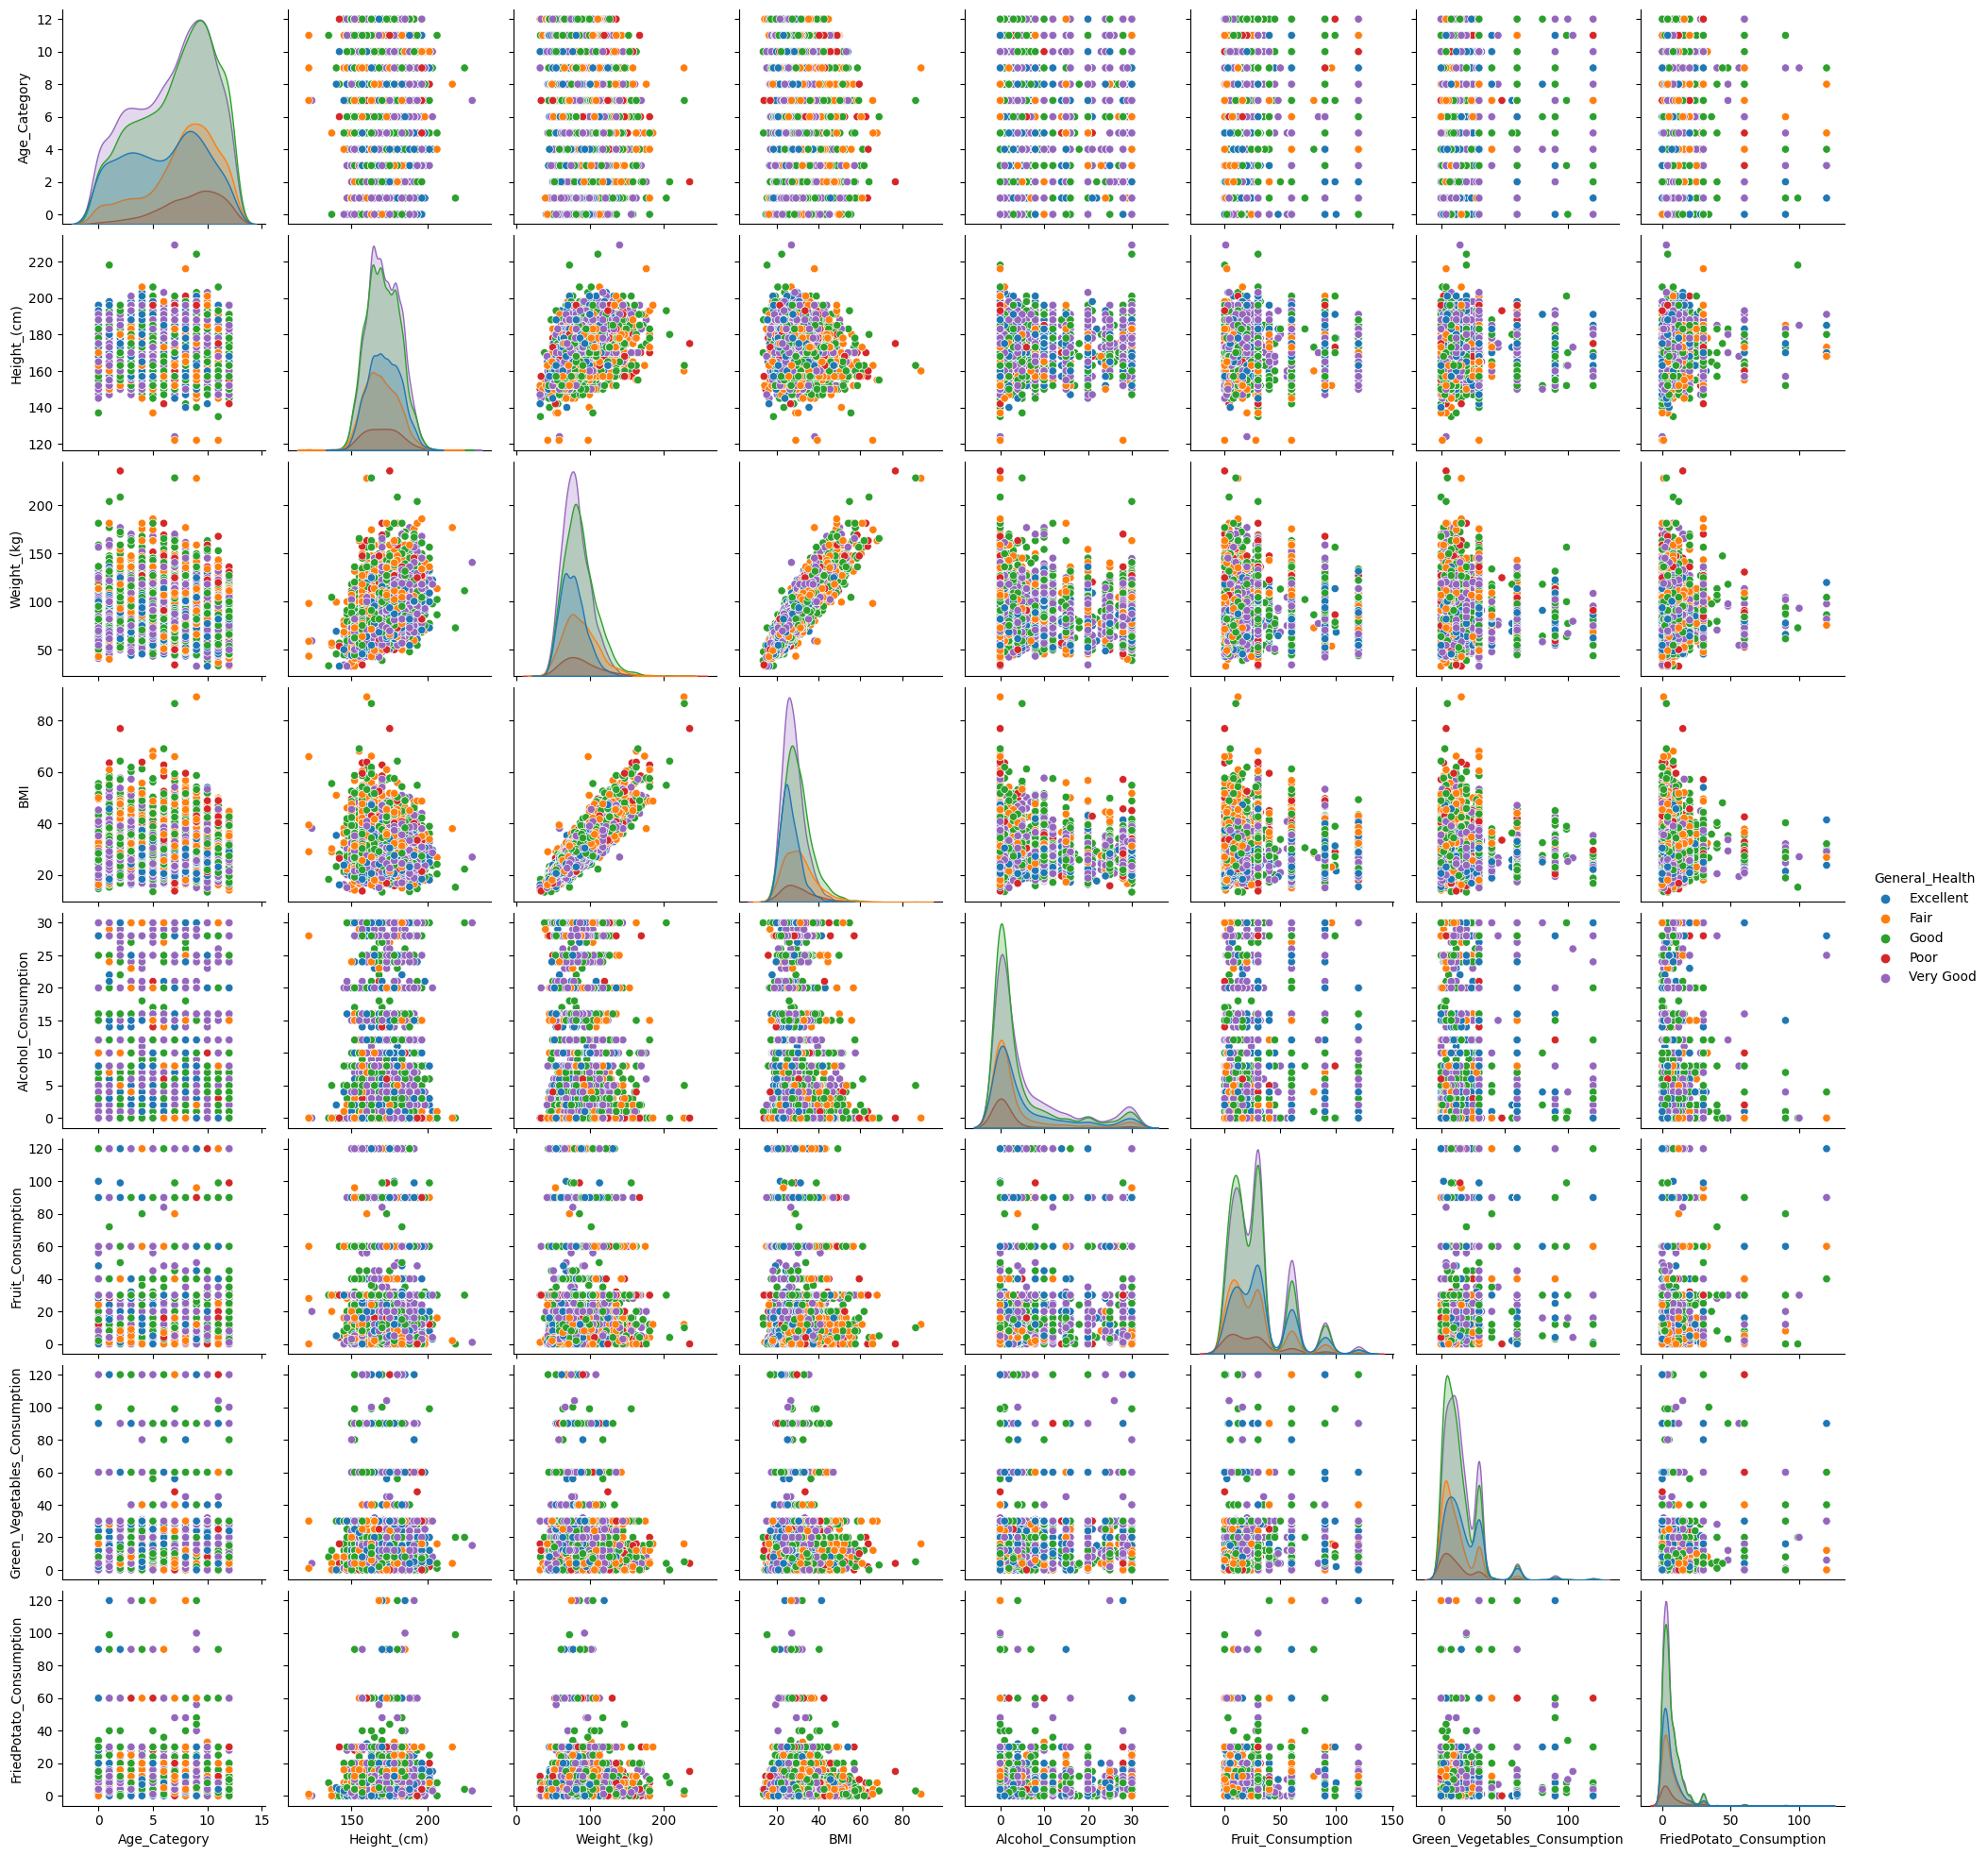

In [32]:
sns.pairplot(dt_copy , hue = "General_Health")

In [33]:
num_data = dt_copy.copy()
dt_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   General_Health                10000 non-null  category
 1   Checkup                       10000 non-null  category
 2   Exercise                      10000 non-null  category
 3   Heart_Disease                 10000 non-null  category
 4   Skin_Cancer                   10000 non-null  category
 5   Other_Cancer                  10000 non-null  category
 6   Depression                    10000 non-null  category
 7   Diabetes                      10000 non-null  category
 8   Arthritis                     10000 non-null  category
 9   Sex                           10000 non-null  category
 10  Age_Category                  10000 non-null  int64   
 11  Height_(cm)                   10000 non-null  float64 
 12  Weight_(kg)                   10000 non-null  f

In [34]:
numvar = ["Weight_(kg)" , "Height_(cm)" , "BMI","General_Health"]

num_data = num_data[numvar]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Weight_(kg)     10000 non-null  float64 
 1   Height_(cm)     10000 non-null  float64 
 2   BMI             10000 non-null  float64 
 3   General_Health  10000 non-null  category
dtypes: category(1), float64(3)
memory usage: 244.5 KB


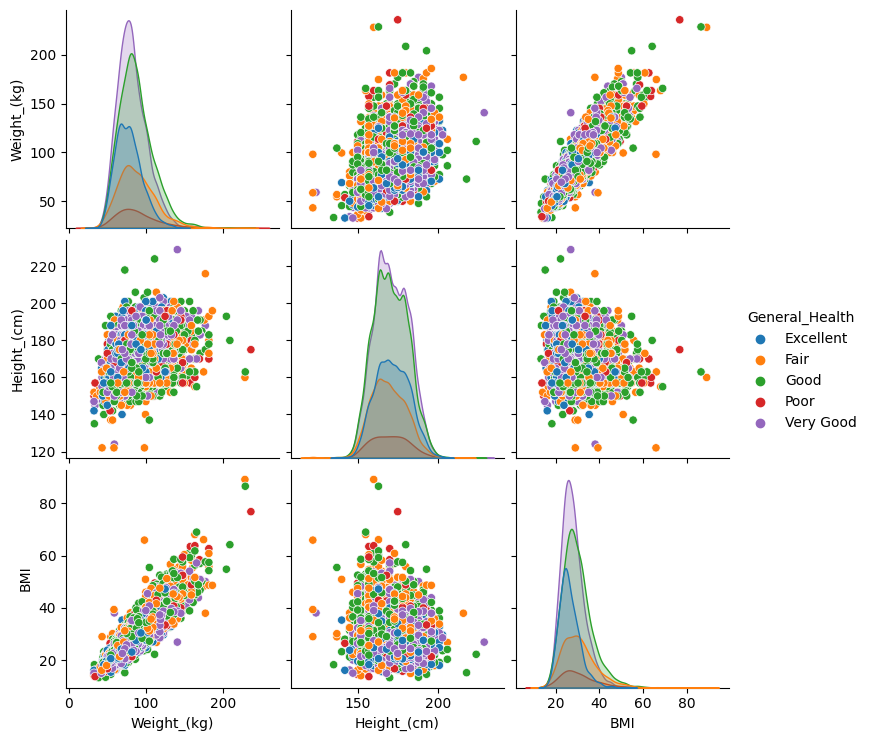

In [35]:
sns.pairplot(num_data , hue = "General_Health")

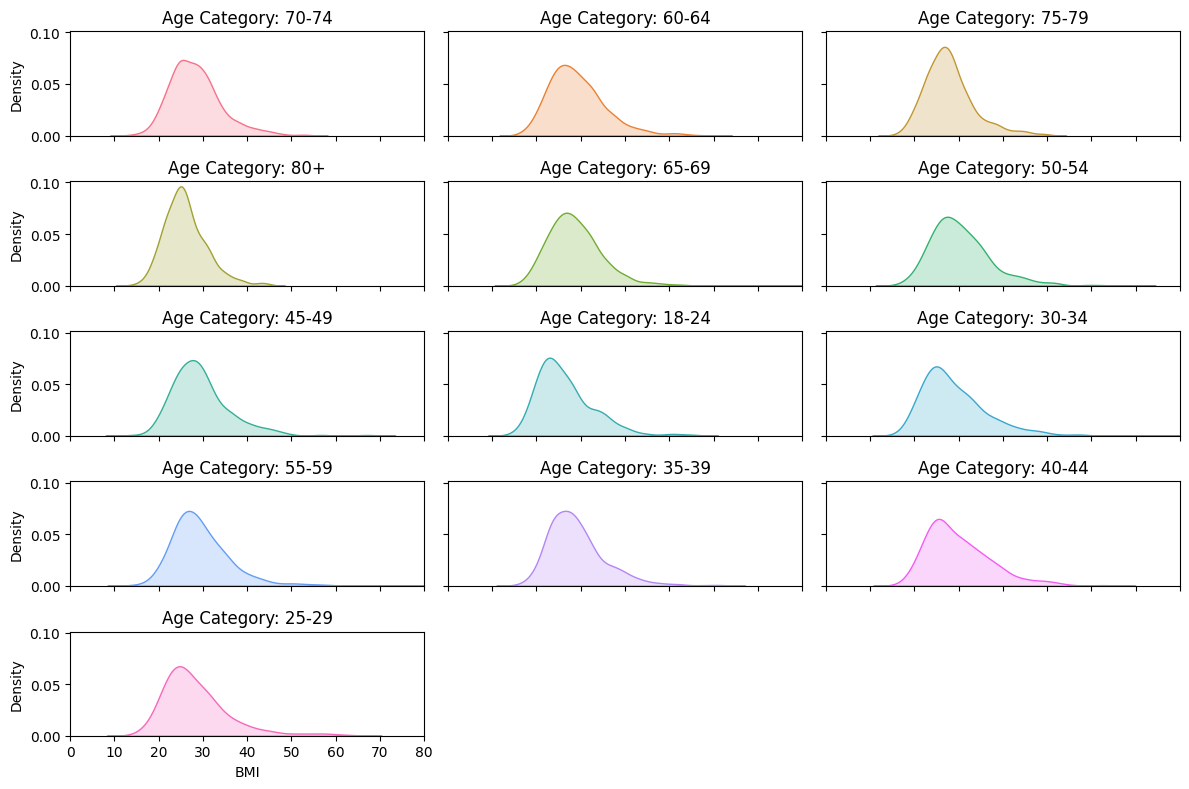

In [36]:
data = dt[:10000]
age_categories = data['Age_Category'].unique()

num_categories = len(age_categories)
num_cols = 3  
num_rows = (num_categories + num_cols - 1) // num_cols  
colors = sns.color_palette("husl", num_categories)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()
for i, (category, color) in enumerate(zip(age_categories, colors)):
    sns.kdeplot(data=data[data['Age_Category'] == category], x='BMI', shade=True, ax=axes[i], color=color)
    axes[i].set_title(f'Age Category: {category}')
    axes[i].set_xlim(0, 80)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

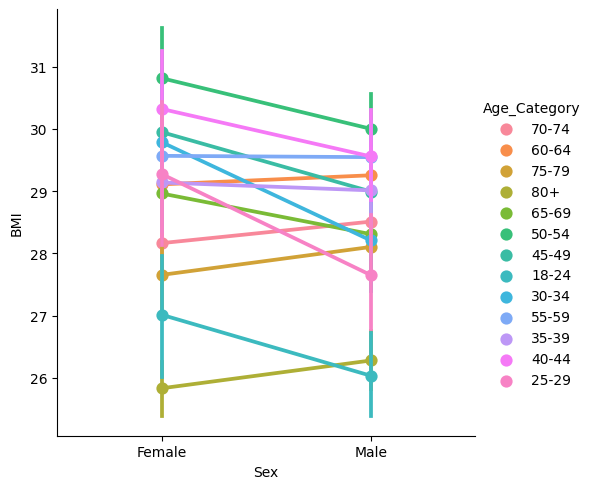

In [37]:
sns.catplot(x="Sex", y="BMI", hue="Age_Category", kind="point", data=data);

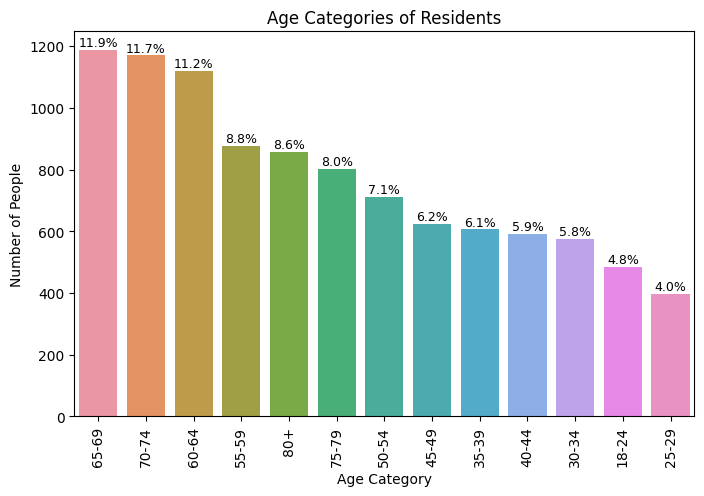

In [38]:
plt.figure(figsize=(8,5))
ages = data["Age_Category"]
ax = sns.countplot(data = data, x="Age_Category", order=ages.value_counts().index)
plt.xticks(rotation=90)
plt.title("Age Categories of Residents")
plt.xlabel("Age Category")
plt.ylabel("Number of People")
patches = ax.patches
for i in range(len(patches)):
    offset = ages.value_counts().max() * 0.01
    per_values = list(ages.value_counts())[i]/ages.value_counts().sum()
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+ offset
    ax.annotate('{:.1f}%'.format(per_values*100), (x, y), ha='center', fontsize=9)
    
plt.show()

*It is important to consider gender as a factor in the healthcare system.

*Men, women, and others may have different health needs and risks.

*Our dataset consists of two genders viz. Male and Female, and the proportion is given in the following figure.

### 1.2 Analysis of Height Data
1.2.1 Distribution of Height (cm) of all Patients

Height of the US residents is approximately normally distributed with mean  170.62cm
  and variance  113.59cm2
 .

Text(0, 0.5, 'Density')

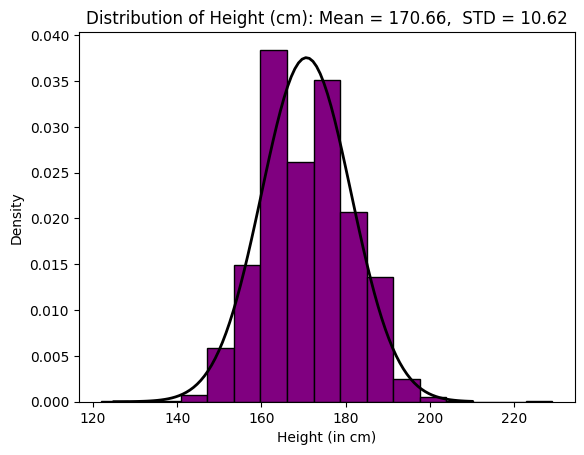

In [39]:
from scipy.stats import norm

data = dt_copy['Height_(cm)'].tolist()

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=17, density=True, ec='k', color='purple')


# Plot the PDF.

x = np.linspace(125, 210, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Distribution of Height (cm): Mean = %.2f,  STD = %.2f" % (mu, std)
plt.title(title)
plt.xlabel("Height (in cm)")
plt.ylabel("Density")
 

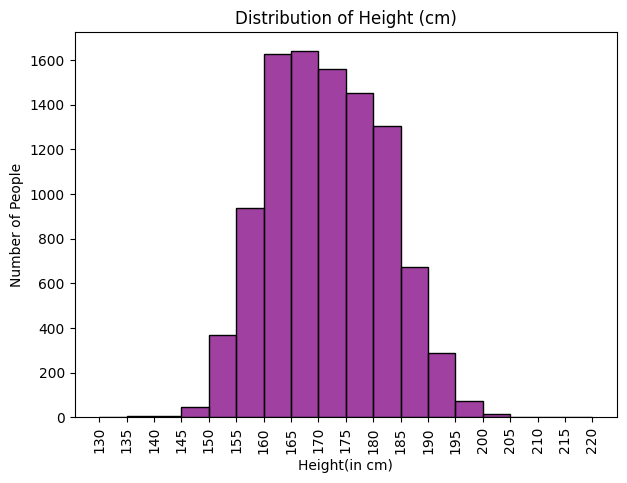

In [40]:
plt.figure(figsize=(7,5))
plt.title("Distribution of Height (cm)")
ax = sns.histplot(dt_copy["Height_(cm)"], bins=[x for x in range(130,221,5)], color='purple')
plt.ylabel("Number of People")
plt.xlabel("Height(in cm)")
plt.xticks([x for x in range(130, 221, 5)], rotation=90)
plt.show()



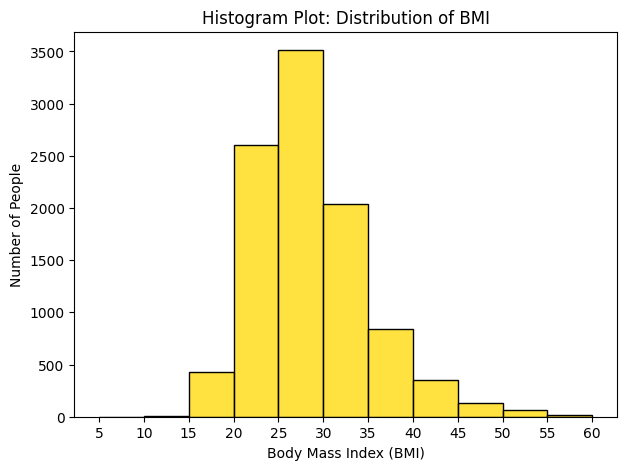

In [41]:
plt.figure(figsize=(7,5))
plt.title("Histogram Plot: Distribution of BMI")
ax = sns.histplot(dt_copy["BMI"], bins=[x for x in range(5, 61, 5)], color="gold")
plt.ylabel("Number of People")
plt.xlabel("Body Mass Index (BMI)")
plt.xticks([x for x in range(5, 61, 5)])
plt.show()

In [42]:
#cleaning the outliers
# Q1 ve Q3 hesaplama

def removeOutliers(e,dt_copy):
    Q1 = dt_copy[e].quantile(0.25)
    Q3 = dt_copy[e].quantile(0.75)

    # IQR hesaplama
    IQR = Q3 - Q1

    # Alt ve üst sınırlar
    alt_sınır = Q1 - 1.5 * IQR
    üst_sınır = Q3 + 1.5 * IQR

    # Aykırı değerlerin sayısını hesaplama
    value = dt_copy[(dt_copy[e] < alt_sınır) | (dt_copy[e]> üst_sınır)].shape[0]
    dt_copy = dt_copy[(dt_copy[e] >= alt_sınır) & (dt_copy[e]<= üst_sınır)]

    return dt_copy,value


In [43]:
for e in dt_copy.select_dtypes(include = ['float64']).columns:
    dt_copy,value = removeOutliers(e,dt_copy)
    print("Variable : {} , Outliers : {}".format(e,value))

Variable : Height_(cm) , Outliers : 33
Variable : Weight_(kg) , Outliers : 210
Variable : BMI , Outliers : 208
Variable : Alcohol_Consumption , Outliers : 1210
Variable : Fruit_Consumption , Outliers : 1690
Variable : Green_Vegetables_Consumption , Outliers : 165
Variable : FriedPotato_Consumption , Outliers : 382


#The number of outliers in Alcohol_Consumption and Fruit_Consumption values are too much as seen

#This fact causes a huge data loss in our data.

#The reason of avoiding this outliers there is already planty of datas and outliers cannot connect with them.

In [44]:
dt_copy.info()   #data after removing outliers

<class 'pandas.core.frame.DataFrame'>
Index: 6102 entries, 0 to 9997
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   General_Health                6102 non-null   category
 1   Checkup                       6102 non-null   category
 2   Exercise                      6102 non-null   category
 3   Heart_Disease                 6102 non-null   category
 4   Skin_Cancer                   6102 non-null   category
 5   Other_Cancer                  6102 non-null   category
 6   Depression                    6102 non-null   category
 7   Diabetes                      6102 non-null   category
 8   Arthritis                     6102 non-null   category
 9   Sex                           6102 non-null   category
 10  Age_Category                  6102 non-null   int64   
 11  Height_(cm)                   6102 non-null   float64 
 12  Weight_(kg)                   6102 non-null   float64

In [45]:
Female = dt_copy[dt_copy.Sex == "Female"]
Male = dt_copy[dt_copy.Sex == "Male"]

In [46]:
import matplotlib.ticker as ticker

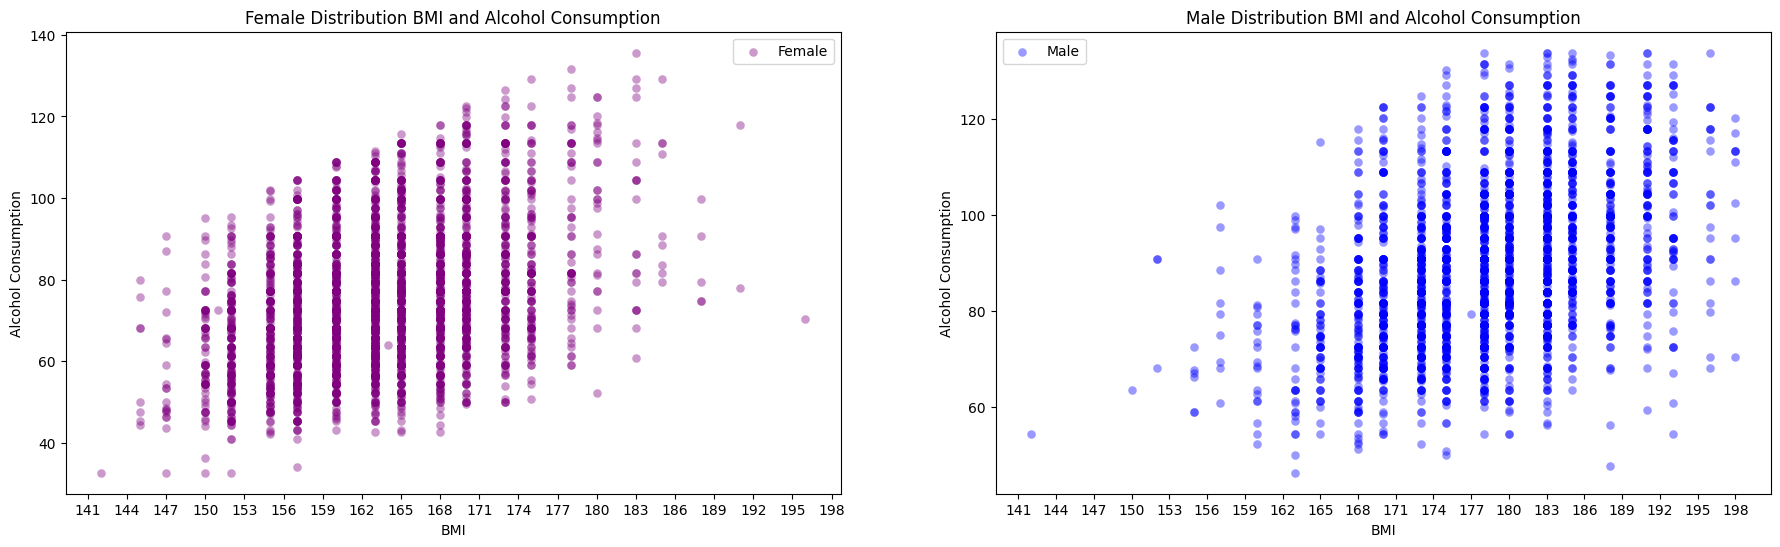

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

ax1.scatter(Female["Height_(cm)"], Female["Weight_(kg)"],alpha=0.4, label="Female", color="Purple", linewidths=0.1)
ax1.set_xlabel("BMI")
ax1.set_ylabel("Alcohol Consumption")
ax1.set_title("Female Distribution BMI and Alcohol Consumption")
ax1.legend()

ax2.scatter(Male["Height_(cm)"],Male["Weight_(kg)"], alpha=0.4, label="Male", color="Blue", linewidths=0.1)
ax2.set_xlabel("BMI")
ax2.set_ylabel("Alcohol Consumption")
ax2.set_title("Male Distribution BMI and Alcohol Consumption")
ax2.legend()

for ax in [ax1, ax2]:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

plt.show()

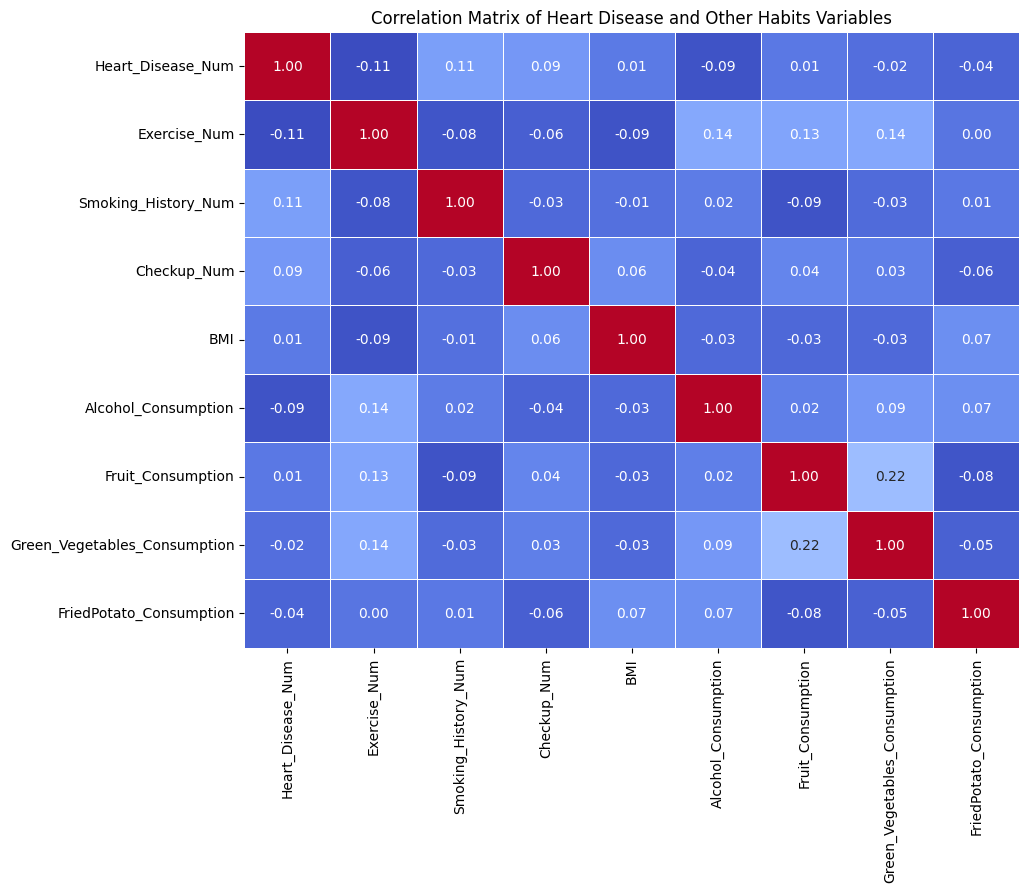

In [48]:
# Create a pivot table to count occurrences of Heart Disease by other categorical variables
heart_disease_pivot = dt_copy.pivot_table(index='Heart_Disease', columns=None, aggfunc='size')

# Convert categorical variables to numerical for correlation calculation
dt_copy['Heart_Disease_Num'] = dt_copy['Heart_Disease'].map({'Yes': 1, 'No': 0})
dt_copy['Exercise_Num'] = dt_copy['Exercise'].map({'Yes': 1, 'No': 0})
dt_copy['Smoking_History_Num'] = dt_copy['Smoking_History'].map({'Yes': 1, 'No': 0})
dt_copy['Checkup_Num'] = dt_copy['Checkup'].map({
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
})

# Selecting numerical columns for correlation matrix
habits_columns = ['Heart_Disease_Num','Exercise_Num', 'Smoking_History_Num', 'Checkup_Num', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Calculating correlation matrix
correlation_matrix = dt_copy[habits_columns].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5, cbar=False)
plt.title('Correlation Matrix of Heart Disease and Other Habits Variables')
plt.show()

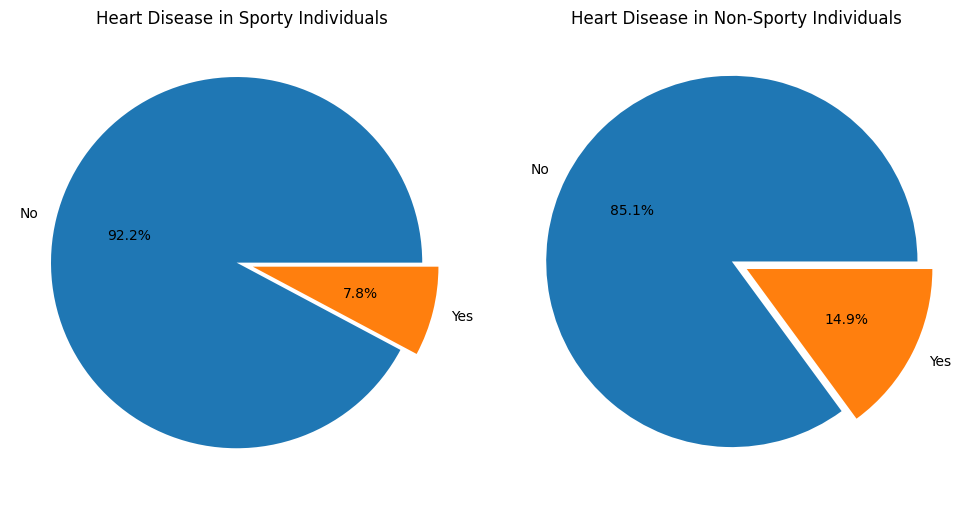

In [49]:
#Divide the DataFrame into sporty and non-sporty individuals
sporty_df = dt_copy[dt_copy['Exercise'] == 'Yes']
non_sporty_df = dt_copy[dt_copy['Exercise'] == 'No']

# Get the count of occurrences for Heart Disease categories for sporty and non-sporty individuals
sporty_heart_disease_counts = sporty_df['Heart_Disease'].value_counts()
non_sporty_heart_disease_counts = non_sporty_df['Heart_Disease'].value_counts()

# Plotting Pie Chart for sporty individuals
plt.figure(figsize=(10, 5))

# Plotting Pie Chart for sporty individuals
plt.subplot(1, 2, 1)
plt.pie(sporty_heart_disease_counts, labels=sporty_heart_disease_counts.index, autopct='%1.1f%%',explode=[0.03, 0.06])
plt.title('Heart Disease in Sporty Individuals')

# Plotting Pie Chart for non-sporty individuals
plt.subplot(1, 2, 2)
plt.pie(non_sporty_heart_disease_counts, labels=non_sporty_heart_disease_counts.index, autopct='%1.1f%%',explode=[0.03, 0.06])
plt.title('Heart Disease in Non-Sporty Individuals')

plt.tight_layout()
plt.show()

These graphs show that practising sport has a direct impact on the risk of suffering a heart attack. In fact, only 6.7% of the sporting population suffered a heart attack, compared with 13% of the nonsporting population.

### 1.3.2 What is the impact of sport and smoking abstinence on heart disease?¶
Next, we can group 2 types of individuals to compare the impact of good and bad habits:

People who haven't smoked and do exercise
People who have smoked and do not exercise


In [50]:
good_habits = (dt_copy['Smoking_History'] == 'No') & (df['Exercise'] == 'Yes') 
bad_habits = (dt_copy['Smoking_History'] == 'Yes') & (df['Exercise'] == 'No')


df_good_habits = dt_copy[good_habits]
df_bad_habits = dt_copy[bad_habits]

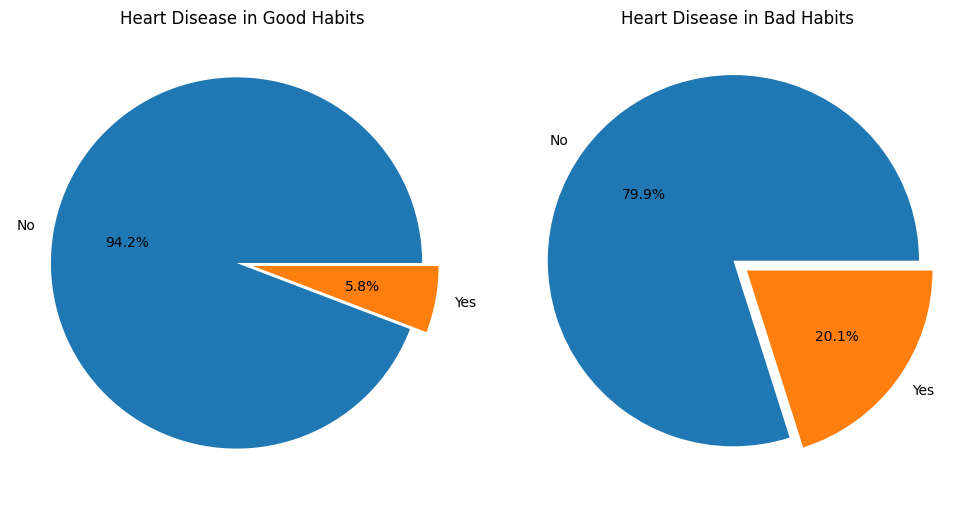

In [51]:
# Counting occurrences of heart disease for good habits and bad habits DataFrames
good_habits_heart_disease_counts = df_good_habits['Heart_Disease'].value_counts()
bad_habits_heart_disease_counts = df_bad_habits['Heart_Disease'].value_counts()

# Plotting pie chart for good habits DataFrame
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(good_habits_heart_disease_counts, labels=good_habits_heart_disease_counts.index, autopct='%1.1f%%',explode=[0.03, 0.06])
plt.title('Heart Disease in Good Habits')

# Plotting pie chart for bad habits DataFrame
plt.subplot(1, 2, 2)
plt.pie(bad_habits_heart_disease_counts, labels=bad_habits_heart_disease_counts.index, autopct='%1.1f%%',explode=[0.03, 0.06])
plt.title('Heart Disease in Bad Habits')

plt.tight_layout()
plt.show()

We can clearly see that with just two habits (non-smoking and exercise), you can drastically prevent heart disease.

### 1.3.3 What is the impact of a healthy diet on heart disease?¶
Even if we saw that the food consumption columns don't have a big correlation with heart disease, let's try to group 2 types of people:

People who eat well: have below-average consumption of fried potatoes and above-average consumption of green vegetables and fruits.
People who eat badly: have an above-average consumption of fried potatoes and a belowaverage consumption of green vegetables and fruits.

1. good_habits: people who haven't smoked and do exercise
2. bad_habits: people who have smoked and do not exercise

In [52]:
avg_fruit_consumption = dt['Fruit_Consumption'].mean()
avg_green_vegetables_consumption = dt['Green_Vegetables_Consumption'].mean()
avg_fried_potato_consumption = dt['FriedPotato_Consumption'].mean()

In [53]:
df_good_food = dt[(dt['Fruit_Consumption'] > avg_fruit_consumption) &
    (dt['Green_Vegetables_Consumption'] > avg_green_vegetables_consumption) &
    (dt['FriedPotato_Consumption'] < avg_fried_potato_consumption)]

df_bad_food = dt[(dt['Fruit_Consumption'] < avg_fruit_consumption) &
    (dt['Green_Vegetables_Consumption'] < avg_green_vegetables_consumption) &
    (dt['FriedPotato_Consumption'] > avg_fried_potato_consumption)]

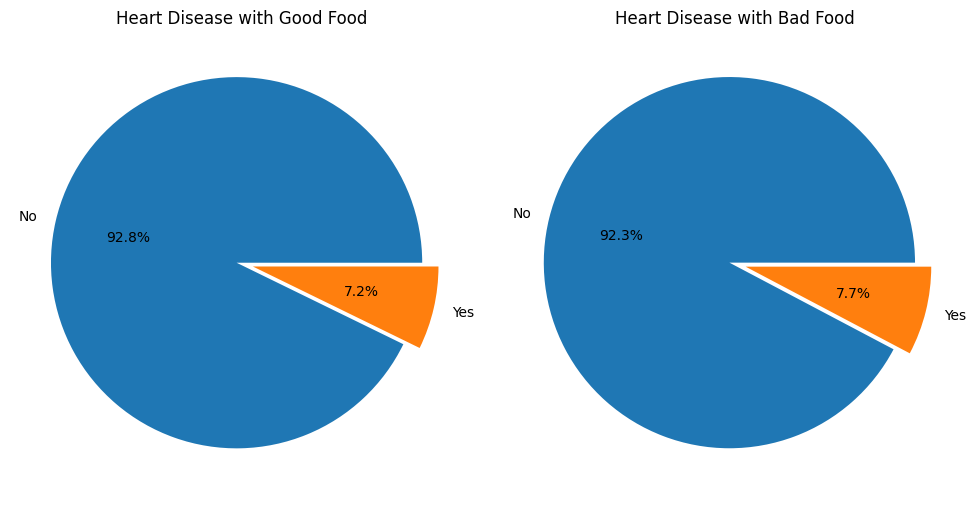

In [54]:
# Counting occurrences of heart disease for good habits and bad habits DataFrames
good_habits_heart_disease_counts = df_good_food['Heart_Disease'].value_counts()
bad_habits_heart_disease_counts = df_bad_food['Heart_Disease'].value_counts()

# Plotting pie chart for good habits DataFrame
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(good_habits_heart_disease_counts, labels=good_habits_heart_disease_counts.index, autopct='%1.1f%%',explode=[0.03, 0.06])
plt.title('Heart Disease with Good Food')

# Plotting pie chart for bad habits DataFrame
plt.subplot(1, 2, 2)
plt.pie(bad_habits_heart_disease_counts, labels=bad_habits_heart_disease_counts.index, autopct='%1.1f%%',explode=[0.03, 0.06])
plt.title('Heart Disease with Bad Food')

plt.tight_layout()
plt.show()

As we can see here, people who eat more healthily are only slightly safer from heart disease. So diet is not the most important factor in the fight against heart disease.

In [55]:
data = dt[:10000]
import plotly.express as px

# Create a sunburst chart with the given dataframe and path
fig1 = px.sunburst(data, path=["Age_Category", "Sex", "Heart_Disease"])

# Update trace information to include labels and percent parent
fig1.update_traces(textinfo="label + percent parent")

# Update layout for title, font, width, and height
fig1.update_layout(
    title_text="Age Category vs Sex vs Heart Disease",
    titlefont={'size': 25, 'family': 'Serif'},
    width=800, height=800
)

# Show the plot in an external browser
fig1.show()

### In this way, we first convert the categorical columns to one hot encoding and then combine the numeric and converted categorical columns. We then train the LOF model and visualize the results.

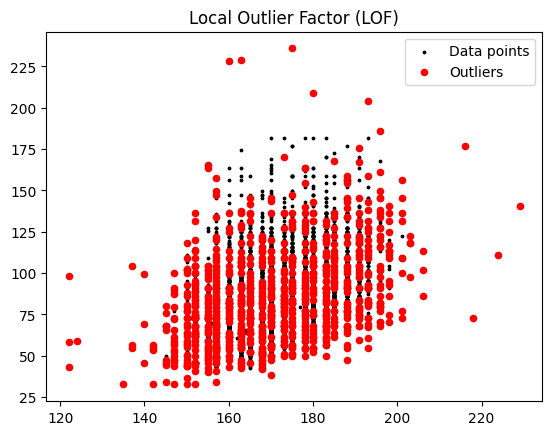

In [56]:
from sklearn.neighbors import LocalOutlierFactor

# Sayısal sütunları seçin
numeric_columns = data.select_dtypes(include=[np.number]).columns
X_numeric = data[numeric_columns].values

# Kategorik sütunları one hot encoding ile dönüştürün
categorical_columns = data.select_dtypes(include=['object']).columns
X_categorical = pd.get_dummies(data[categorical_columns]).values

# Tüm verileri birleştirin
X = np.concatenate((X_numeric, X_categorical), axis=1)

# LOF modelini tanımlayın ve eğitin
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)
lof_scores = -lof.negative_outlier_factor_

# Outlier'ları belirleyin
outliers = X[y_pred == -1]

# Sonuçları plotlayın (ilk iki sayısal sütunu kullanarak)
plt.scatter(X[:, 0], X[:, 1], color='k', s=3.0, label='Data points')
plt.scatter(outliers[:, 0], outliers[:, 1], color='r', s=20, label='Outliers')
plt.title('Local Outlier Factor (LOF)')
plt.legend()
plt.show()


# Explanation
Local Outlier Factor: It computes a score called the LOF score for each data point. Points with an LOF score significantly greater than 1 are considered outliers.

n_neighbors: The number of neighbors to use for computing the local density. A typical default value is 20.

contamination: The expected proportion of outliers in the data. It is used to set the threshold on the LOF scores for identifying outliers.